# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



#### You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
#### Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition                                                                                          
•	ID: Unique client ID                                                                                              
•	age: Age of the client                                                                                     
•	job: Type of job                                                                                            
•	marital: Marital status of the client                                                                               
•	education: Education level                                                                                    
•	default: Credit in default.                                                                                     
•	housing: Housing loan                                                                    
•	loan: Personal loan                                                                                              
•	contact: Type of communication                                                                                        
•	month: Contact month                                                                                                
•	day_of_week: Day of week of contact                                                                                
•	duration: Contact duration                                                                                     
•	campaign: number of contacts performed during this campaign to the client                                             
•	pdays: number of days that passed by after the client was last contacted                                        
•	previous: number of contacts performed before this campaign                                                          
•	poutcome: outcome of the previous marketing campaign                                                                      
#### Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



#### Dataset Link-
•	https://github.com/dsrscientist/dataset5                                                                              
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv                                
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv                                  


In [1]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df_train = pd.read_csv("termdeposit_train.csv")

In [3]:
df_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Dataset has 31647 rows and 18 columns. subscribed is the target variable. column subscribed contains two values(yes and No). 

### Exploratory Data Analysis (EDA)

In [4]:
# checkig dimension of the dataset
df_train.shape
print('Total number of rows-',df_train.shape[0],'\nTotal number of columns-',df_train.shape[1])

Total number of rows- 31647 
Total number of columns- 18


In [5]:
# checking the types of the columns
df_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

Columns have two types of data int64 and object.

In [6]:
# column ID is not useful in prediction, so dropping it 
df_train.drop('ID',axis= 1,inplace=True)

In [7]:
# dividing columns in two parts categorical columns and numeriacl columns.
cat_columns = []
num_columns = []
for i in df_train.columns:
    if df_train[i].dtypes=="object":
        cat_columns.append(i)
    else:
        num_columns.append(i)
print('categorical columns =',cat_columns)
print('numerical columns =',num_columns)

categorical columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
numerical columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [8]:
# checking null values
print("Null values in columns -")
print(df_train.isnull().sum())
print("\nTotal null values in dataset - ",df_train.isnull().sum().sum())

Null values in columns -
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Total null values in dataset -  0


No null values present.

In [9]:
# lets check all information at one place
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [10]:
# lets check the duplicate rows in dataset
df_train.duplicated().sum()

0

In [11]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('number of unique value in',i,'column -',dataframe[i].nunique())
        print(dataframe[i].value_counts())
        print('\n')    

In [12]:
value_count(df_train)

number of unique value in age column - 76
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


number of unique value in job column - 12
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


number of unique value in marital column - 3
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


number of unique value in education column - 4
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


number of unique value in default column - 2
no     31062
yes      585
Name: default, dtype: int64


number of unique value in balance column - 6326
 0        2470
 1         137
 2  

In [13]:
# description of dataset
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
# checking description of categorical columns
df_train.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


### Data visualization

In [15]:
def plot(name):
    plt.figure(figsize = (25,35), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 20:
            ax = plt.subplot(5 , 2 , plotnumber)
            plot_name(df_train[i],color='pink')
            plt.xlabel(i, fontsize = 16)
            plotnumber +=1
    plt.show()

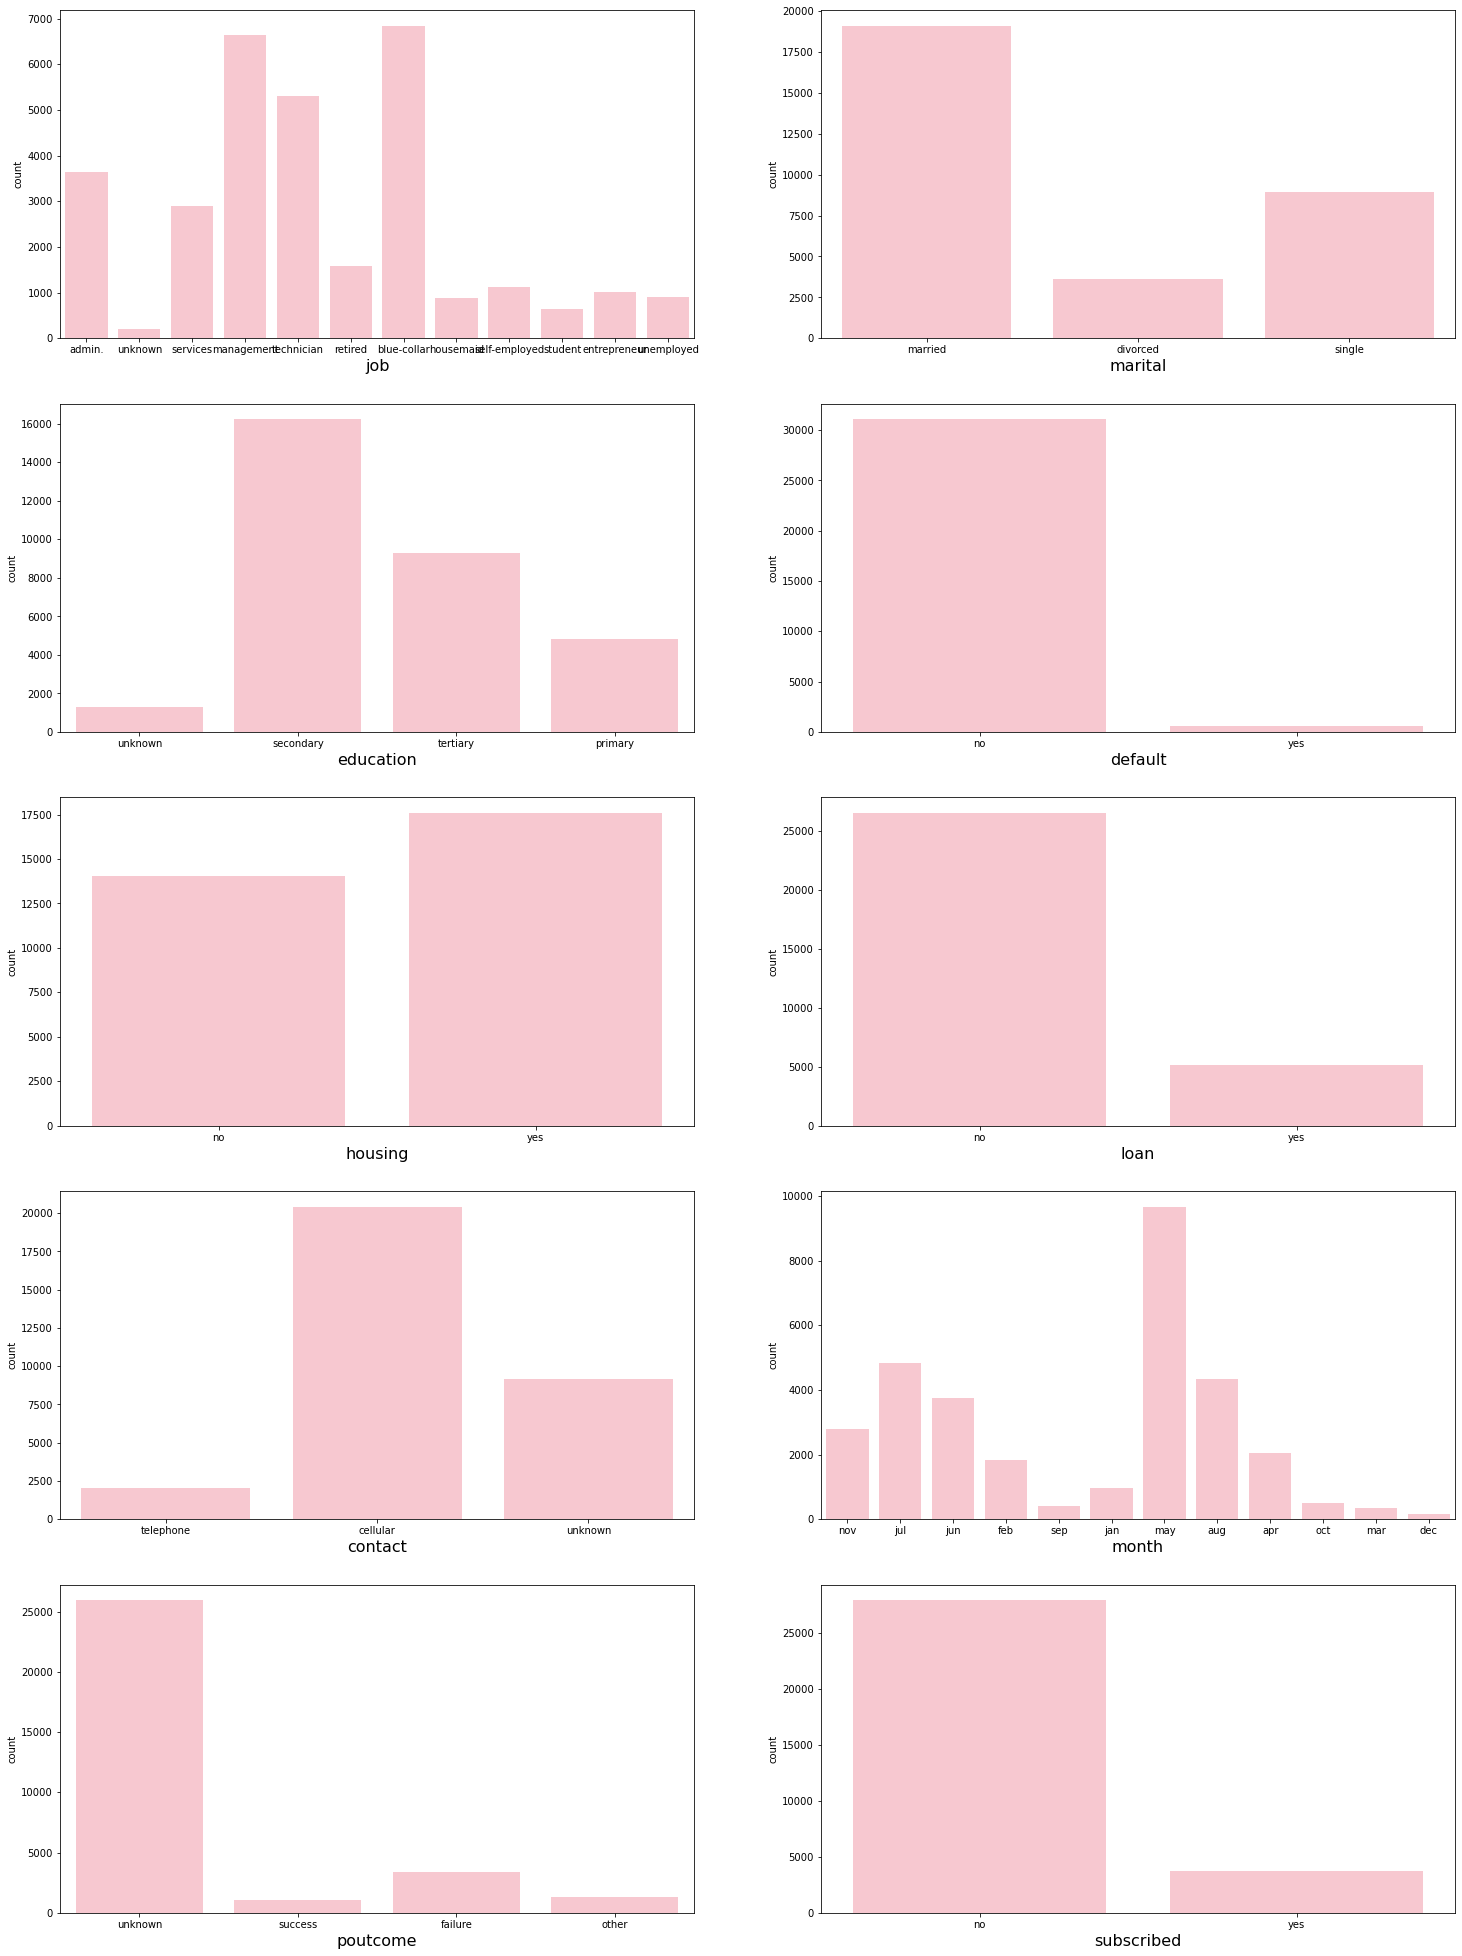

In [16]:
# histogram plot
plot_name = sns.countplot
plot(cat_columns)

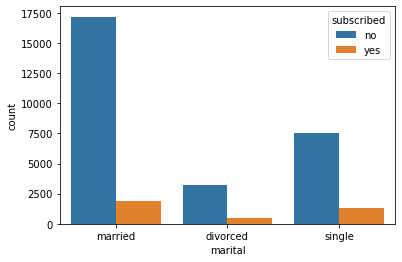

In [17]:
sns.countplot(data=df_train,x='marital', hue='subscribed')
plt.show()

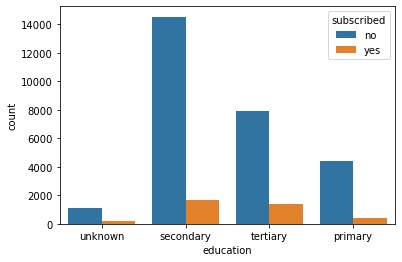

In [18]:
sns.countplot(data=df_train,x='education',hue='subscribed')
plt.show()

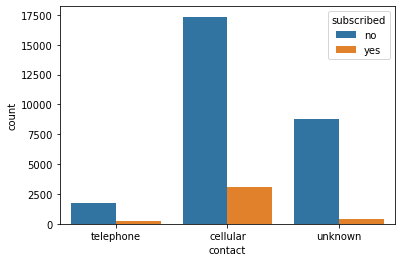

In [19]:
sns.countplot(data=df_train,x='contact', hue='subscribed')
plt.show()

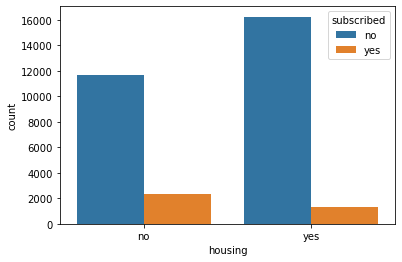

In [20]:
sns.countplot(data=df_train,x='housing', hue='subscribed')
plt.show()

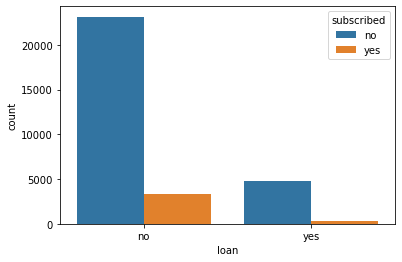

In [21]:
sns.countplot(data=df_train,x='loan', hue='subscribed')
plt.show()

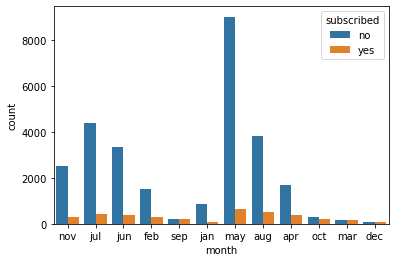

In [22]:
sns.countplot(data=df_train,x='month',hue='subscribed')
plt.show()

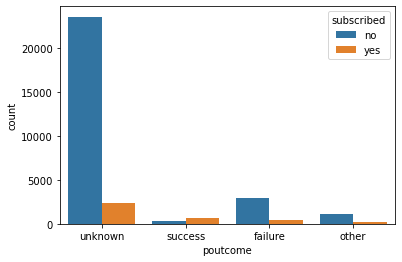

In [23]:
sns.countplot(data=df_train,x='poutcome', hue='subscribed')
plt.show()

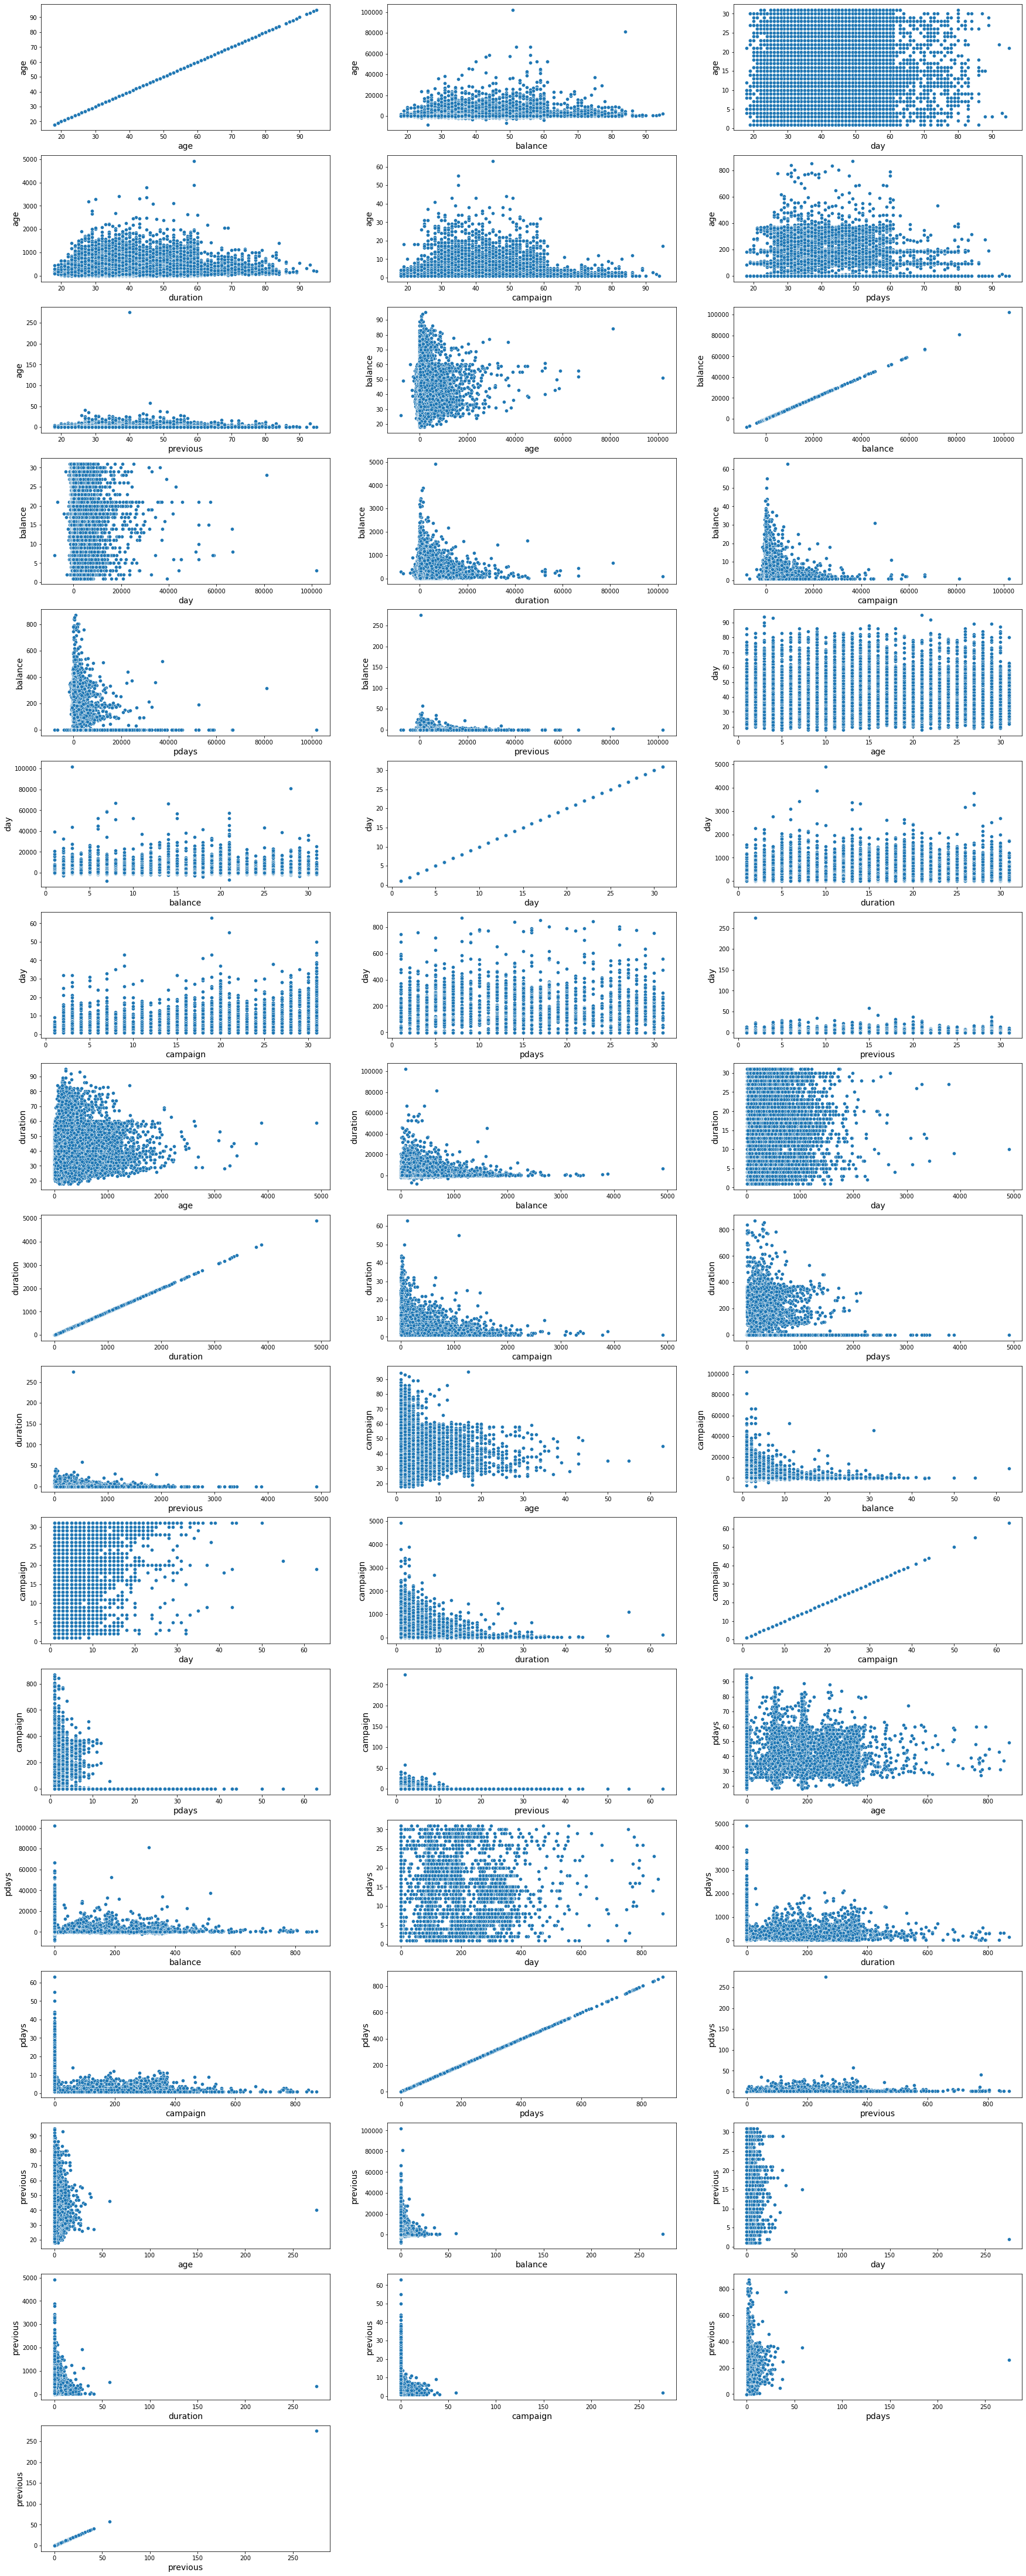

In [24]:
# scatter plot
plt.figure(figsize=(30,80), facecolor='white')
plotnumber = 1

for column in num_columns:
    for i in num_columns:
        if plotnumber <= 50:
            plt.subplot(17,3,plotnumber)
            sns.scatterplot(df_train[column],df_train[i],data=df_train)
            plt.ylabel(column, fontsize=14)
            plt.xlabel(i, fontsize=14)
        plotnumber+=1
plt.show()    

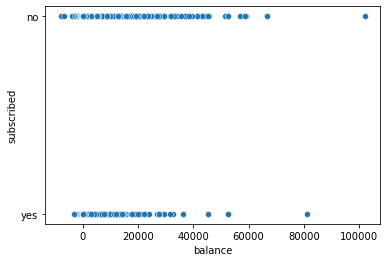

In [25]:
sns.scatterplot(x = 'balance', y= 'subscribed',data=df_train)
plt.show()

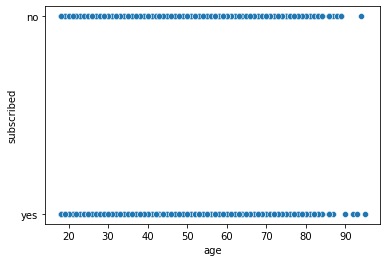

In [26]:
sns.scatterplot(x = 'age', y= 'subscribed',data=df_train)
plt.show()

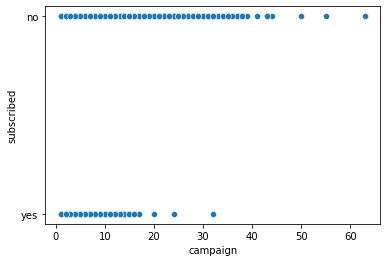

In [27]:
sns.scatterplot(x = 'campaign', y= 'subscribed',data=df_train)
plt.show()

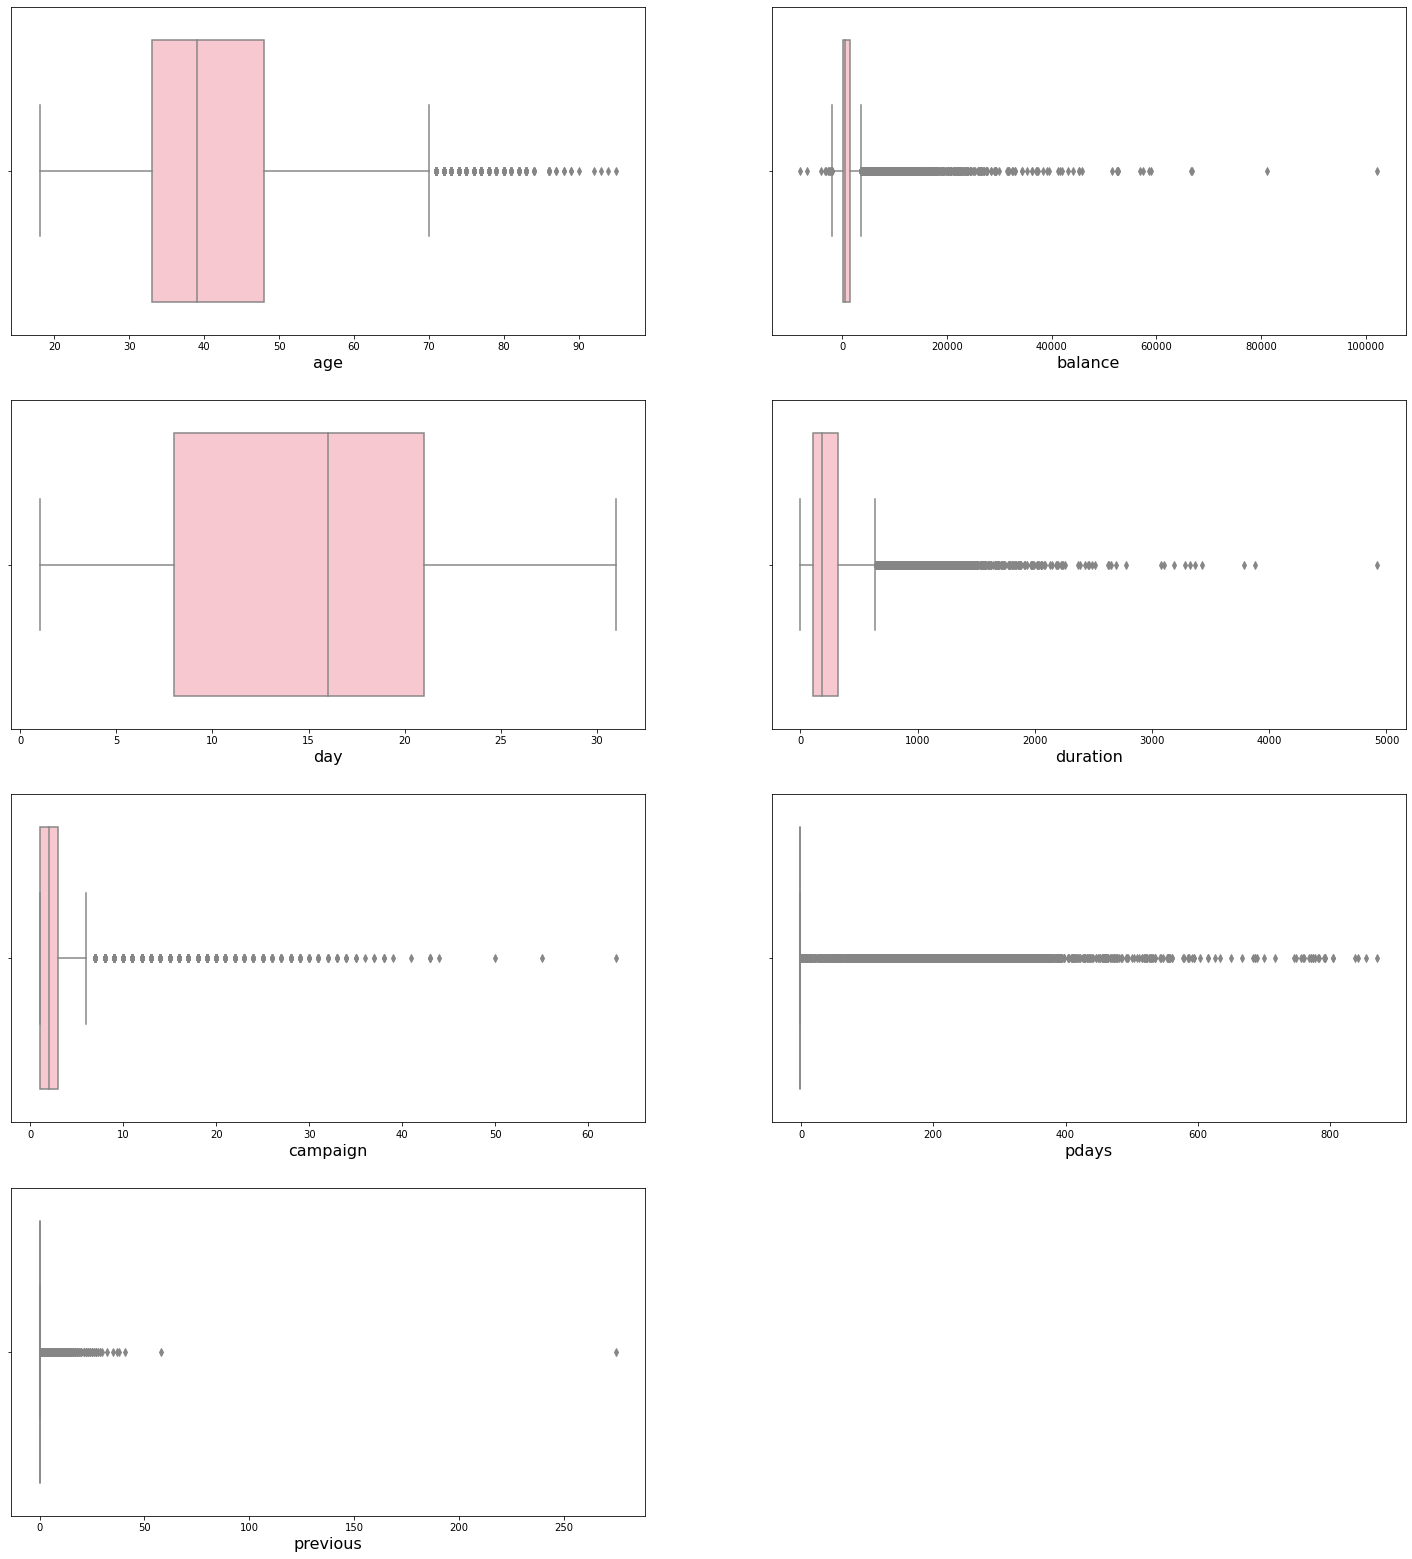

In [28]:
# checking outliers
plot_name = sns.boxplot
plot(num_columns)

In [29]:
# creating list of columns which contain outliers
out_col = ['balance','duration','campaign','pdays','previous']

In [30]:
# first method
total_outliers = []
for i in out_col:
    q1 = df_train[i].quantile(0.25)
    q3 = df_train[i].quantile(0.75)
    iqr = q3-q1

    high = (q3 + (1.5*iqr))
    low = (q3 - (1.5*iqr))
   
    outliers_high = np.where(df_train[i]> high)
    outliers_low = np.where(df_train[i]< low)
    print('\nOutliers indices in',i)
    
    print(outliers_high)
    print(outliers_low)
    
    outliers = len(outliers_high[0])+len(outliers_low[0])
    
    print('\nOutliers in',i,'=',outliers,'\n') 
    print('---------------------------------------------------------------')
    
    for i in outliers_high[0]:
        total_outliers.append(i)
    for j in outliers_low[0]:
        total_outliers.append(j)
        
total_outliers.sort()

total_outliers = set(total_outliers)

print('\nTotal outliers in dataset=',len(total_outliers))
print('\nData loss will be',(len(total_outliers)/df_train.shape[0])*100,'%')


Outliers indices in balance
(array([   17,    18,    25, ..., 31624, 31625, 31637], dtype=int64),)
(array([   32,   109,   163,   189,   210,   618,   751,   753,   838,
         896,  1132,  1280,  1431,  1447,  1468,  1508,  1512,  1719,
        1764,  2097,  2137,  2802,  2938,  2977,  3006,  3078,  3106,
        3233,  3400,  3508,  3566,  3763,  3904,  3946,  3999,  4009,
        4010,  4030,  4245,  4324,  4343,  4464,  4591,  4601,  4639,
        4774,  4846,  4920,  5062,  5173,  5285,  5491,  5543,  5593,
        5710,  5799,  5860,  5886,  5952,  5993,  6023,  6038,  6374,
        6618,  6698,  6711,  6717,  6737,  6897,  6907,  7152,  7419,
        7833,  8045,  8143,  8182,  8190,  8201,  8244,  8629,  8677,
        8725,  9014,  9117,  9148,  9340,  9443,  9564,  9694,  9761,
        9767,  9791, 10246, 10268, 10295, 10365, 10431, 10570, 10641,
       10692, 10797, 10849, 10863, 11107, 11222, 11329, 11332, 11525,
       11759, 11832, 11939, 11959, 12153, 12380, 12422, 125

In [31]:
# second method
x1= df_train.drop(columns = ['subscribed'])
y1 = df_train['subscribed']

# z-score
from scipy.stats import zscore
z = np.abs(zscore(df_train[out_col]))

threshold = 3
outliers1 = np.where(z>3)
print('Outliers',outliers1)

out = set(outliers1[0])
print('\nTotal outliers =',len(out))

print('\nData loss will be',(len(out)/df_train.shape[0])*100,'%')

Outliers (array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([2, 0, 3, ..., 3, 4, 1], dtype=int64))

Total outliers = 3276

Data loss will be 10.351692103516921 %


Since data loss is high in both methods, I will continue with outliers.

In [32]:
# checking correlation
df_train.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


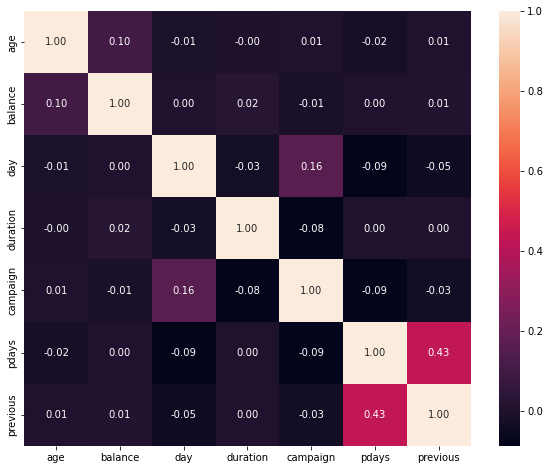

In [33]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f")
plt.show()

In [34]:
# encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in cat_columns:
    df_train[i] = OE.fit_transform(df_train[i].values.reshape(-1,1))
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [35]:
# separating target variable and features
x = df_train.drop(columns = ['subscribed'])
y = df_train['subscribed']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [37]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.187933,-1.118201,-0.439893,0.395076,0.379579,1.154007,-0.832754,-0.245906,-0.408555,-0.237059,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.449397,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.649957,-0.245906,-0.408555,-0.237059,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,-0.156159,0.894294,-0.439893,-0.716695,0.259631,-0.177462,-0.070449,-0.567059,-0.408555,-0.237059,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,0.635055,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.368149,-0.567059,0.447299,1.001336,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.411091,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.474054,-0.567059,-0.408555,-0.237059,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.125392,-0.101755,1.371563,1.034442,-0.137234,-0.450388,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.552724,-0.245906,-0.408555,-0.237059,0.441777
31643,1.133439,-0.101755,-1.922374,1.034442,-0.137234,-0.324903,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.699635,-0.245906,-0.408555,-0.237059,0.441777
31644,-0.843038,-0.101755,1.371563,1.034442,-0.137234,-0.347358,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-0.859979,0.075247,-0.408555,-0.237059,0.441777
31645,1.509911,1.426448,-0.275405,-0.300345,-0.137234,-0.376088,0.894294,-0.439893,0.395076,-0.100212,0.821140,-0.918319,1.359859,2.994723,4.716521,-2.613048


In [38]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,age,1.283253
1,job,1.050495
2,marital,1.222506
3,education,1.067258
4,default,1.012817
5,balance,1.034343
6,housing,1.191470
7,loan,1.020545
8,contact,1.321742
9,day,1.037956


In [39]:
y.value_counts()

0.0    27932
1.0     3715
Name: subscribed, dtype: int64

In [40]:
# balancing data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)
print(x.shape)
print(y.shape)

(55864, 16)
(55864,)


In [41]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [42]:
# creating lists of models
LR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

model_list= [LR,RFC,ABC,DTC,GBC,KNN,ETC,svc]

In [43]:
# finding best random state
def model_rs(model):
    max_acc = 0
    max_rs = 0
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        if acc>max_acc:
            max_acc=acc
            max_rs = i
    print('maximum accuracy=',max_acc,'\nbest random state=',max_rs)

In [44]:
# maximum accuracy at random state
model_rs(LR)

maximum accuracy= 0.818019093078759 
best random state= 125


In [45]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=125)

In [46]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    CM = confusion_matrix(y_test,y_pred)
    CR = classification_report(y_test,y_pred)
    print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)
    
    print('checking Cross validation score:-\n')
    score_cv = cross_val_score(name,x,y)
    cv_mean = score_cv.mean()
    diff = (acc_score - cv_mean)
    print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

In [47]:
# all models
for i in model_list:
    print('\n_____________ Using',i,'_____________\n')
    model(i)


_____________ Using LogisticRegression() _____________

Accuracy score = 0.818019093078759 

confusion matrix:-
 [[6896 1508]
 [1542 6814]] 

classification report:-
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      8404
         1.0       0.82      0.82      0.82      8356

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760

checking Cross validation score:-

cross validation scores:- [0.80229124 0.81267341 0.81079388 0.82171306 0.81095596] 
cross validation mean score = 0.8116855089226049 
Difference between accuracy score and cross validation mean score = 0.006333584156154037

_____________ Using RandomForestClassifier() _____________

Accuracy score = 0.9492243436754176 

confusion matrix:-
 [[7830  574]
 [ 277 8079]] 

classification report:-
               precision    recall  f1-score   support

         0.0       

Our best model is DecisionTreeClassifier. It has least difference between accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [48]:
# parameter for DecisionTreeClassifier
param = {'splitter':['best','random'],
         'criterion':['gini','entropy','log_loss'],
         'max_depth':[25,50,70,110],
         'random_state':[69,123,177,195]
        }

GSCV= GridSearchCV(estimator=DTC,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [25, 50, 70, 110],
                         'random_state': [69, 123, 177, 195],
                         'splitter': ['best', 'random']})

In [49]:
# finding best parameter value
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'random_state': 123,
 'splitter': 'best'}

In [50]:
Model = DecisionTreeClassifier(criterion='entropy',max_depth=50, random_state= 123, splitter= 'best')

In [51]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.911217183770883 

confusion matrix:-
 [[7611  793]
 [ 695 7661]] 

classification report:-
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.91      8404
         1.0       0.91      0.92      0.91      8356

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



In [52]:
# saving model
import pickle
pickle.dump(Model,open('Term_deposit.pkl','wb'))

#### Test data

In [53]:
# reading test data
df_test = pd.read_csv("termdeposit_test.csv")
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


test data has 13564 rows and 17 columns. Only features variables are present in the  test dataset.

In [54]:
# checkig dimension of the dataset
df_test.shape
print('Total number of rows-',df_test.shape[0],'\nTotal number of columns-',df_test.shape[1])

Total number of rows- 13564 
Total number of columns- 17


In [55]:
# checking the types of the columns
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [56]:
# columns value counts
value_count(df_test)

number of unique value in ID column - 13564
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


number of unique value in age column - 75
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


number of unique value in job column - 12
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


number of unique value in marital column - 3
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


number of unique value in education column - 4
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int6

In [57]:
# column ID is not useful in prediction, so dropping it 
df_test.drop('ID',axis= 1,inplace=True)

In [58]:
# checking null values
print("Null values in columns -")
print(df_test.isnull().sum())
print("\nTotal null values in dataset - ",df_test.isnull().sum().sum())

Null values in columns -
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Total null values in dataset -  0


In [59]:
# lets check the duplicate rows in dataset
df_test.duplicated().sum()

0

In [60]:
# lets check all information at one place
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.7+ MB


In [61]:
# dividing columns in two parts categorical columns and numeriacl columns.
cat_columns1 = []
num_columns1 = []
for i in df_test.columns:
    if df_test[i].dtypes=="object":
        cat_columns1.append(i)
    else:
        num_columns1.append(i)
print('Test categorical columns =',cat_columns1)
print('Test numerical columns =',num_columns1)

Test categorical columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Test numerical columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [62]:
# encoding test categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in cat_columns1:
    df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1,1))
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test_scaled = scaler.fit_transform(df_test)

In [64]:
df_test = pd.DataFrame(df_test_scaled,columns=df_test.columns)
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.297500,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.297500,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.297500,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.297500,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.426069,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.426644,0.405281,-0.418199,-0.297500,0.452163
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.299239,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.387957,-0.574850,-0.418199,-0.297500,0.452163
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.348218,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.473070,-0.574850,-0.418199,-0.297500,0.452163
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,-0.290155,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.194517,-0.248140,0.483926,1.203911,-0.542830


In [65]:
# test data prediction 
df_test_pred=Model.predict(df_test)
df_test_pred

array([0., 0., 0., ..., 0., 1., 1.])